## Title of Assignment 5 :-
Implement the Continuous Bag of Words (CBOW) Model. Stages can be: 
a. Data preparation 
b. Generate training data 
c. Train model
d. Output

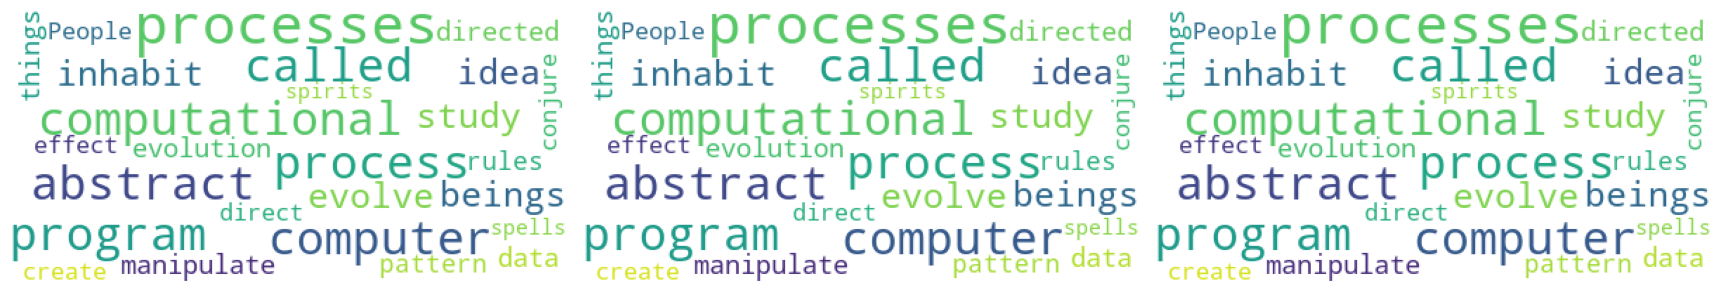

In [1]:
import re
import numpy as np
import string
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
data ="""We are about to study the idea of a computational process.
Computational processes are abstract beings that inhabit computers.
As they evolve, processes manipulate other abstract things called data.
The evolution of a process is directed by a pattern of rules
called a program. People create programs to direct processes. In effect,
we conjure the spirits of the computer with our spells."""

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(data)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 24))
axes[0].imshow(wordcloud)
axes[0].axis('off')
axes[1].imshow(wordcloud)
axes[1].axis('off')
axes[2].imshow(wordcloud)
axes[2].axis('off')
fig.tight_layout()

**Step 1 - Cleaning the data**

In [2]:
# remove special characters
sentences = "Hi, I am Sujit Mali. I study in PCCOE. We are living in Pune to study."
sentences= re.sub('[^A-Za-z0-9]+', ' ', sentences)

# remove 1 letter words
sentences= re.sub(r'(?:^| )\w(?:$| )', ' ', sentences).strip()

# lower all characters
sentences = sentences.lower()

**Step 2 - Vocabulary**

In [3]:
words = sentences.split()
vocab = set(words)

In [4]:
vocab_size = len(vocab)
embed_dim = 10
context_size = 2

**Step 3 - Implementating the model**

**Dictionaries**

In [5]:
word_to_ix = {word: i for i, word in enumerate(vocab)}
ix_to_word = {i: word for i, word in enumerate(vocab)}

**Data Bags**

In [6]:
# data - [(context), target]

data = []
for i in range(2, len(words) - 2):
    context = [words[i - 2], words[i - 1], words[i + 1], words[i + 2]]
    target = words[i]
    data.append((context, target))
print(data[:5])

[(['hi', 'am', 'mali', 'study'], 'sujit'), (['am', 'sujit', 'study', 'in'], 'mali'), (['sujit', 'mali', 'in', 'pccoe'], 'study'), (['mali', 'study', 'pccoe', 'we'], 'in'), (['study', 'in', 'we', 'are'], 'pccoe')]


**Embeddings**

In [7]:
embeddings =  np.random.random_sample((vocab_size, embed_dim))

**Linear Model**

In [8]:
def linear(m, theta):
        w = theta
        return m.dot(w)

**Log softmax + NLLloss = Cross Entropy**

In [9]:
def log_softmax(x):
    e_x = np.exp(x - np.max(x))
    return np.log(e_x / e_x.sum())

In [10]:
def NLLLoss(logs, targets):
    out = logs[range(len(targets)), targets]
    return -out.sum()/len(out)

In [11]:
def log_softmax_crossentropy_with_logits(logits,target):

    out = np.zeros_like(logits)
    out[np.arange(len(logits)),target] = 1
    
    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)
    
    return (- out + softmax) / logits.shape[0]

**Forward function**

In [12]:
def forward(context_idxs, theta):
    m = embeddings[context_idxs].reshape(1, -1)
    n = linear(m, theta)
    o = log_softmax(n)
    
    return m, n, o

**Backward function**

In [13]:
def backward(preds, theta, target_idxs):
    m, n, o = preds
    
    dlog = log_softmax_crossentropy_with_logits(n, target_idxs)
    dw = m.T.dot(dlog)
    
    return dw

**Optimize function**

In [14]:
def optimize(theta, grad, lr=0.03):
    theta -= grad * lr
    return theta

**Step 4 - Training**

In [15]:
theta = np.random.uniform(-1, 1, (2 * context_size * embed_dim, vocab_size))

In [16]:
epoch_losses = {}

for epoch in range(80):

    losses =  []

    for context, target in data:
        context_idxs = np.array([word_to_ix[w] for w in context])
        preds = forward(context_idxs, theta)

        target_idxs = np.array([word_to_ix[target]])
        loss = NLLLoss(preds[-1], target_idxs)

        losses.append(loss)

        grad = backward(preds, theta, target_idxs)
        theta = optimize(theta, grad, lr=0.03)
        
     
    epoch_losses[epoch] = losses

**Step 5 - Analyzing**

Text(0, 0.5, 'Losses')

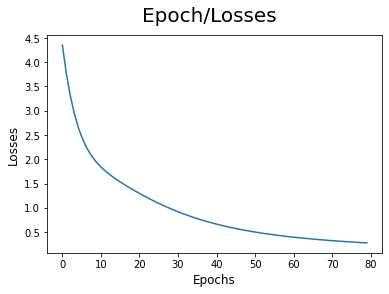

In [17]:
ix = np.arange(0,80)

fig = plt.figure()
fig.suptitle('Epoch/Losses', fontsize=20)
plt.plot(ix,[epoch_losses[i][0] for i in ix])
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Losses', fontsize=12)

**Step 6 - Predicting the function**

In [18]:
def predict(words):
    context_idxs = np.array([word_to_ix[w] for w in words])
    preds = forward(context_idxs, theta)
    word = ix_to_word[np.argmax(preds[-1])]
    
    return word

In [20]:
predict(['we', 'are', 'to', 'study'])

'living'

**Step 7 - Checking the accuracy**

In [19]:
def accuracy():
    wrong = 0

    for context, target in data:
        if(predict(context) != target):
            wrong += 1
            
    return (1 - (wrong / len(data)))

In [21]:
accuracy()

1.0

## Conclusion : 
We have successfully implemented the Continuous Bag of Words (CBOW) Model.